In [1]:
from zipfile import ZipFile
dataset = '/content/archive1.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask=os.listdir('/content/data/with_mask/')
print(with_mask[0:5])
print(with_mask[-5:])

['with_mask_265.jpg', 'with_mask_2307.jpg', 'with_mask_3378.jpg', 'with_mask_1555.jpg', 'with_mask_1658.jpg']
['with_mask_1158.jpg', 'with_mask_1992.jpg', 'with_mask_2344.jpg', 'with_mask_2846.jpg', 'with_mask_2397.jpg']


In [3]:
without_mask=os.listdir('/content/data/without_mask/')
print(without_mask[0:5])
print(without_mask[-5:])

['without_mask_1637.jpg', 'without_mask_58.jpg', 'without_mask_2881.jpg', 'without_mask_1355.jpg', 'without_mask_2336.jpg']
['without_mask_505.jpg', 'without_mask_2322.jpg', 'without_mask_2920.jpg', 'without_mask_3551.jpg', 'without_mask_2315.jpg']


In [4]:
print(len(with_mask))
print(len(without_mask))

3725
3828


In [5]:
with_mask_labels=[1]*len(with_mask)
without_mask_labels=[0]*len(without_mask)

In [6]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
labels=with_mask_labels+without_mask_labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


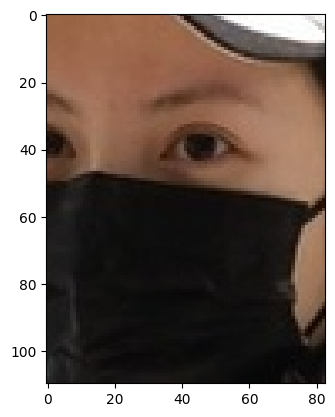

In [8]:
img=mpimg.imread('/content/data/with_mask/with_mask_265.jpg')
plt.imshow(img)
plt.show()

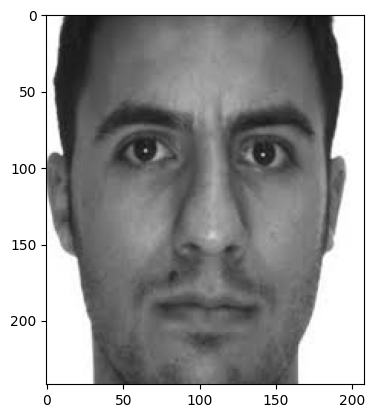

In [9]:
img=mpimg.imread('/content/data/without_mask/without_mask_2322.jpg')
plt.imshow(img)
plt.show()

In [10]:
with_mask_path='/content/data/with_mask/'

data=[]

for img in with_mask:
  image=Image.open(with_mask_path+img)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'

for img in without_mask:
  image=Image.open(without_mask_path+img)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
data

[array([[[149,  99,  66],
         [149,  99,  66],
         [150, 100,  67],
         ...,
         [255, 255, 255],
         [253, 253, 253],
         [251, 251, 251]],
 
        [[150, 100,  67],
         [150, 100,  67],
         [150, 100,  67],
         ...,
         [246, 246, 246],
         [249, 249, 249],
         [251, 251, 251]],
 
        [[151, 100,  68],
         [151, 100,  68],
         [151, 100,  68],
         ...,
         [238, 238, 236],
         [243, 242, 241],
         [243, 242, 241]],
 
        ...,
 
        [[ 58,  60,  59],
         [ 51,  52,  52],
         [ 40,  42,  41],
         ...,
         [ 19,  14,  13],
         [ 27,  22,  21],
         [ 33,  29,  28]],
 
        [[ 46,  46,  46],
         [ 43,  43,  43],
         [ 39,  39,  39],
         ...,
         [ 20,  14,  14],
         [ 33,  27,  27],
         [ 43,  37,  37]],
 
        [[ 32,  32,  32],
         [ 35,  35,  35],
         [ 38,  38,  38],
         ...,
         [ 20,  14,  14],
  

In [12]:
data[0]

array([[[149,  99,  66],
        [149,  99,  66],
        [150, 100,  67],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [251, 251, 251]],

       [[150, 100,  67],
        [150, 100,  67],
        [150, 100,  67],
        ...,
        [246, 246, 246],
        [249, 249, 249],
        [251, 251, 251]],

       [[151, 100,  68],
        [151, 100,  68],
        [151, 100,  68],
        ...,
        [238, 238, 236],
        [243, 242, 241],
        [243, 242, 241]],

       ...,

       [[ 58,  60,  59],
        [ 51,  52,  52],
        [ 40,  42,  41],
        ...,
        [ 19,  14,  13],
        [ 27,  22,  21],
        [ 33,  29,  28]],

       [[ 46,  46,  46],
        [ 43,  43,  43],
        [ 39,  39,  39],
        ...,
        [ 20,  14,  14],
        [ 33,  27,  27],
        [ 43,  37,  37]],

       [[ 32,  32,  32],
        [ 35,  35,  35],
        [ 38,  38,  38],
        ...,
        [ 20,  14,  14],
        [ 35,  29,  29],
        [ 47,  41,  41]]

In [13]:
data[0].shape

(128, 128, 3)

In [14]:
X=np.array(data)
Y=np.array(labels)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
nclasses=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(nclasses,activation='sigmoid'))

In [19]:
from keras.engine.training import optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [20]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 16s 23ms/step - loss: 0.4787 - acc: 0.8063 - val_loss: 0.2451 - val_acc: 0.8926
Epoch 2/10
170/170 [==============================] - 3s 19ms/step - loss: 0.2718 - acc: 0.8904 - val_loss: 0.2029 - val_acc: 0.9107
Epoch 3/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2371 - acc: 0.9049 - val_loss: 0.2241 - val_acc: 0.9140
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1917 - acc: 0.9261 - val_loss: 0.1825 - val_acc: 0.9289
Epoch 5/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1618 - acc: 0.9354 - val_loss: 0.1814 - val_acc: 0.9355
Epoch 6/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1383 - acc: 0.9459 - val_loss: 0.2378 - val_acc: 0.9339
Epoch 7/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1190 - acc: 0.9542 - val_loss: 0.2055 - val_acc: 0.9471
Epoch 8/10
170/170 [==============================] - 3s 18ms/step -

In [21]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.3510 - acc: 0.9298
Test Accuracy = 0.929847776889801


Enter the path of Image to be tested/content/data/with_mask/with_mask_1023.jpg


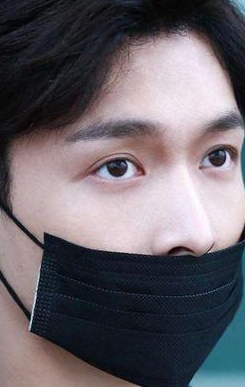

1/1 [==============================] - 0s 73ms/step
[[0.1432951 0.6750417]]
Preson is wearing a mask


In [33]:
inpath=input('Enter the path of Image to be tested')
image=cv2.imread(inpath)
cv2_imshow(image)
image=cv2.resize(image,(128,128))
image=image/255
image = np.reshape(image, [1,128,128,3])
pred=model.predict(image)

print(pred)

label=np.argmax(pred)

if label==1: print("Preson is wearing a mask")
else: print("Preson is not wearing a mask")